**Инструкция по выполнению**
В этом задании вам нужно проследить за изменением качества случайного леса в зависимости от количества деревьев в нем.

1. Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.
2. Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. Если вы используете Pandas, то подойдет следующий код: data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
3. Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.
4. Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold.  В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).
5. Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.
6. Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

In [24]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import copy
from sklearn.model_selection import cross_val_score

1

In [25]:
data = pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


2

In [26]:
#convert column 'field' into numbers
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

3

In [27]:
X = copy.deepcopy(data)
X.drop('Rings', axis = 1, inplace = True)
y = data['Rings']

4

In [28]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
scores = []
for trees in range(1, 51):
    forest = RandomForestRegressor(n_estimators = trees, random_state = 1)
    forest.fit(X, y)
    prediction = forest.predict(X)
    score = cross_val_score(forest, X, y, cv = kf, scoring = 'r2')
    scores.append(score.mean())
print(scores)

[0.10967482068860261, 0.3413000096365689, 0.406433829066129, 0.4447745857536912, 0.46503241426823594, 0.47139595825898917, 0.4766658451893487, 0.4829348394224631, 0.4894370162945041, 0.4954085552428177, 0.4944111155773555, 0.49902817866563326, 0.5030578549564464, 0.5073168234618861, 0.5091809969556578, 0.5114105314179662, 0.5148917747729636, 0.5172203573170132, 0.5198293095329432, 0.51948435033775, 0.520529096463528, 0.5208044230080824, 0.521742855685855, 0.5231059969795335, 0.5232486470488318, 0.5243076139284634, 0.5246393588459404, 0.5256557724971402, 0.5265556293057552, 0.5270858715838138, 0.5276420438225101, 0.5289244806388986, 0.5301073722643779, 0.5299613734264366, 0.5298209779129148, 0.529910050667947, 0.5294320415136227, 0.5294715388671245, 0.529515898349607, 0.5294703580378128, 0.5298087685207094, 0.5300433306143383, 0.5299135764090978, 0.5296814957917958, 0.528908112349864, 0.5290083070325597, 0.5291786571646144, 0.5300509396315634, 0.530813058616495, 0.5309509147417047]


5

In [29]:
min_trees = 0
for i in range(len(scores)):
    if round(scores[i], 2) > 0.52:
        min_trees = i
        break
min_trees + 1

28

6

Populating the interactive namespace from numpy and matplotlib


C:\Users\ksesha\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


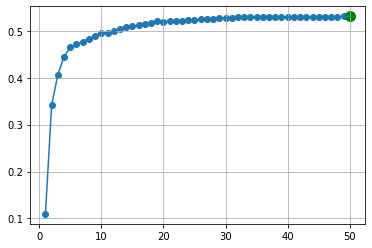

In [30]:
#let's visualize
%pylab inline
plt.plot(range(1, 51), scores)
plt.scatter(range(1, 51), scores)
best_point = np.argmax(scores)
plt.grid()
plt.scatter(best_point + 1, scores[best_point], c='g', s=100)